# Predicting 5 or 1 stars

In [1]:
import nltk
import pandas as pd
import seaborn as sns
import string
nltk.download('all')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [2]:
data = pd.read_csv('yelp.csv')
data["length"] = data.text.apply(len)
data.drop(["business_id", "review_id", "user_id", "type"], axis=1, inplace=True)
data.head()

,date,stars,text,cool,useful,funny,length
0,2011-01-26,5,My wife took me here on my birthday for breakf...,2,5,0,889
1,2011-07-27,5,I have no idea why some people give bad review...,0,0,0,1345
2,2012-06-14,4,love the gyro plate. Rice is so good and I als...,0,1,0,76
3,2010-05-27,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1,2,0,419
4,2012-01-05,5,General Manager Scott Petello is a good egg!!!...,0,0,0,469


In [3]:
filter_bad_good = data.stars.isin([1, 5])
data_bad_good = data[filter_bad_good]

In [4]:
import string
from nltk.corpus import stopwords
import nltk

stemmer = nltk.RSLPStemmer()
stopwords = list(stopwords.words("english"))
punctuation = [word for word in string.punctuation]
punctuation += ['...', '  ', '\n']



def remove_punctuation(serie, stopwords):
    aux = list()
    for el in serie:
        for word in stopwords:
            el = el.replace(word,' ')
        aux.append(el)
    return aux

def remove_stopwords(serie, stopwords):
    tokenizer = nltk.WordPunctTokenizer()

    result_serie= list()
    for row in serie:
        aux = list()
        text_row = tokenizer.tokenize(row.lower())
        for word in text_row:
            if word not in stopwords: # stopwords
                aux.append(word)
        result_serie.append(' '.join(aux))
    return result_serie

# EDA

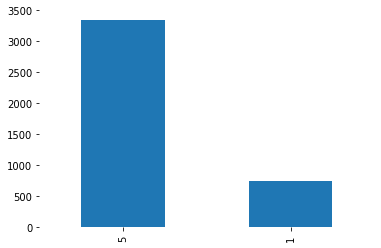

In [5]:
data_bad_good.stars.value_counts().plot(kind='bar')
plt.box(False)

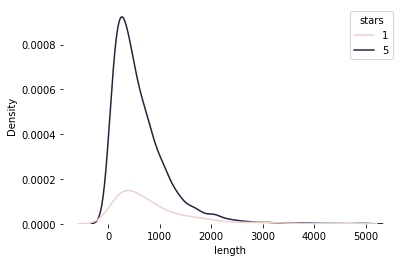

In [6]:
sns.kdeplot(x ='length', hue='stars',data= data_bad_good)
plt.box(False)

# Pre-processing

In [7]:
data_bad_good.text = data_bad_good.text.str.lower()
data_bad_good.text = remove_stopwords(data_bad_good.text, punctuation)
data_bad_good.text = remove_stopwords(data_bad_good.text, stopwords)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [8]:
data_bad_good

,date,stars,text,cool,useful,funny,length
0,2011-01-26,5,wife took birthday breakfast excellent weather...,2,5,0,889
1,2011-07-27,5,idea people give bad reviews place goes show p...,0,0,0,1345
3,2010-05-27,5,rosie dakota love chaparral dog park !!! conve...,1,2,0,419
4,2012-01-05,5,general manager scott petello good egg !!! go ...,0,0,0,469
6,2010-02-12,5,drop drive ate go back next day food good cute...,7,7,4,1565
...,...,...,...,...,...,...,...
9990,2011-10-03,5,yes rock hipster joints dig place little bit s...,1,1,1,263
9991,2011-12-05,5,4 stars notes folks rated place low must isola...,1,1,0,908
9992,2009-03-10,5,normally one jump reviewing chain restaurant e...,2,3,2,1326
9994,2012-03-19,5,let see like surprise stadium well 9 50 tall c...,1,2,1,1968


In [9]:
vectorize = CountVectorizer()

X = vectorize.fit_transform(data_bad_good.text)
Y = data_bad_good.stars.map({5: 1, 1: 0}).values

In [10]:
X

<4086x19041 sparse matrix of type '<class 'numpy.int64'>'
	with 213016 stored elements in Compressed Sparse Row format>

# Modelling
---
Vamos aplicar o modelo de Naive Bayes

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

model = MultinomialNB()

model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [13]:
predictions = model.predict(X_test)

# Avaliação do modelo
---
Duas maneiras simples de avaliar a qualidade do nosso modelo, é o relatório de classificação e a matriz de confusão

In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75       167
           1       0.92      0.96      0.94       651

    accuracy                           0.90       818
   macro avg       0.87      0.82      0.84       818
weighted avg       0.90      0.90      0.90       818



In [15]:
confusion_matrix(y_test, predictions)

array([[115,  52],
       [ 26, 625]])

Nosso modelo conseguiu ótimos resultados